In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import FactorAnalysis

In [3]:
# Load the dataset
df = pd.read_csv('medquad.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print("\
Dataset Information:")
print(df.info())

                                 question  \
0                What is (are) Glaucoma ?   
1                  What causes Glaucoma ?   
2     What are the symptoms of Glaucoma ?   
3  What are the treatments for Glaucoma ?   
4                What is (are) Glaucoma ?   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   

  focus_area  
0   Glaucoma  
1   Glaucoma  
2   Glaucoma  
3   Glaucoma  
4   Glaucoma  
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


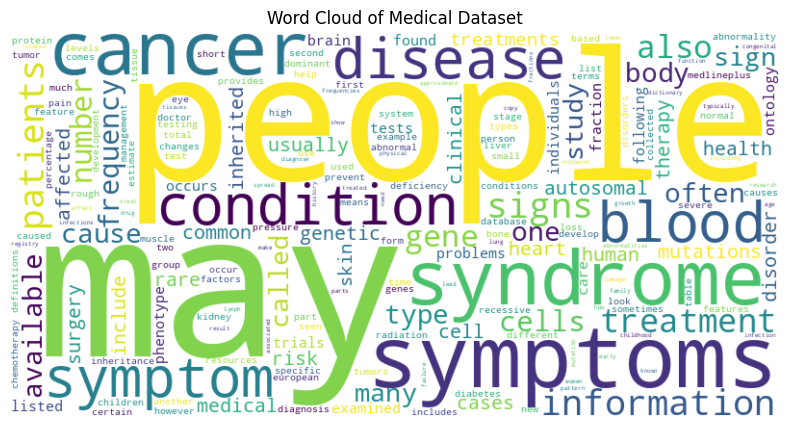

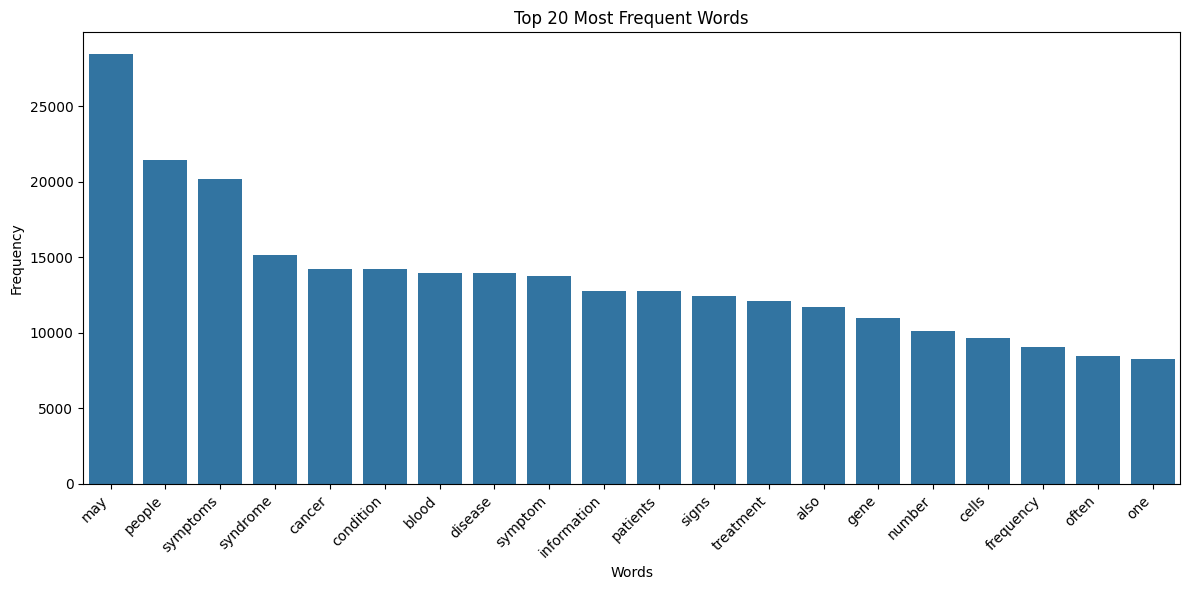

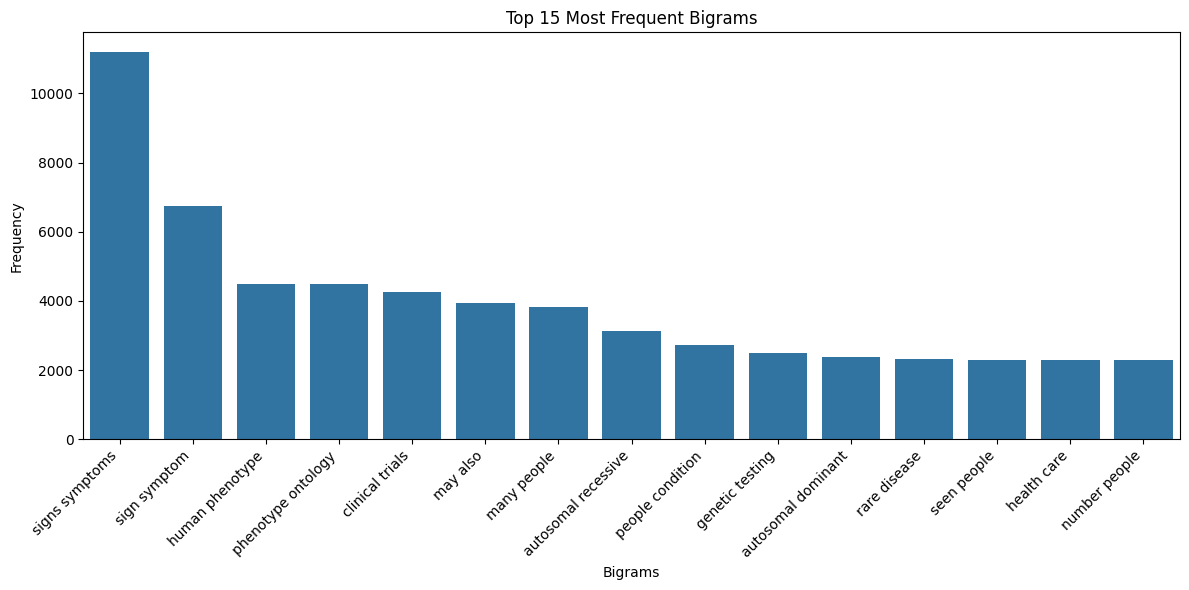

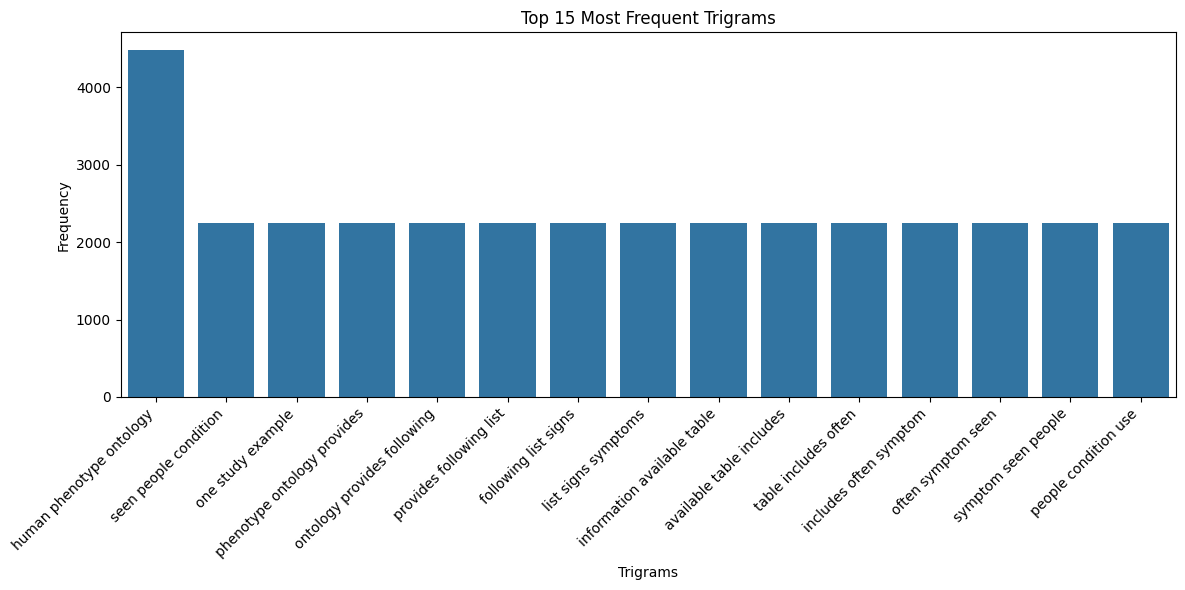

Text analysis completed.


In [5]:
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

df['question'] = df['question'].astype(str)
df['answer'] = df['answer'].astype(str)

# Combine questions and answers for analysis
all_text = ' '.join(df['question'] + ' ' + df['answer'])

# Preprocess the text
tokens = preprocess_text(all_text)

# Create word frequency distribution
word_freq = Counter(tokens)

# Create and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Medical Dataset')
plt.show()

# Plot top 20 most frequent words
top_words = word_freq.most_common(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Generate bigrams and trigrams
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Plot top 15 bigrams
bigram_freq = Counter(bigrams)
top_bigrams = bigram_freq.most_common(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=[' '.join(gram[0]) for gram in top_bigrams], y=[gram[1] for gram in top_bigrams])
plt.title('Top 15 Most Frequent Bigrams')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot top 15 trigrams
trigram_freq = Counter(trigrams)
top_trigrams = trigram_freq.most_common(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=[' '.join(gram[0]) for gram in top_trigrams], y=[gram[1] for gram in top_trigrams])
plt.title('Top 15 Most Frequent Trigrams')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Text analysis completed.")

                                question  \
count                              16412   
unique                             14984   
top     What causes Causes of Diabetes ?   
freq                                  20   

                                                   answer source  \
count                                               16412  16412   
unique                                              15818      9   
top     This condition is inherited in an autosomal re...    GHR   
freq                                                  348   5430   

           focus_area  
count           16398  
unique           5126  
top     Breast Cancer  
freq               53  


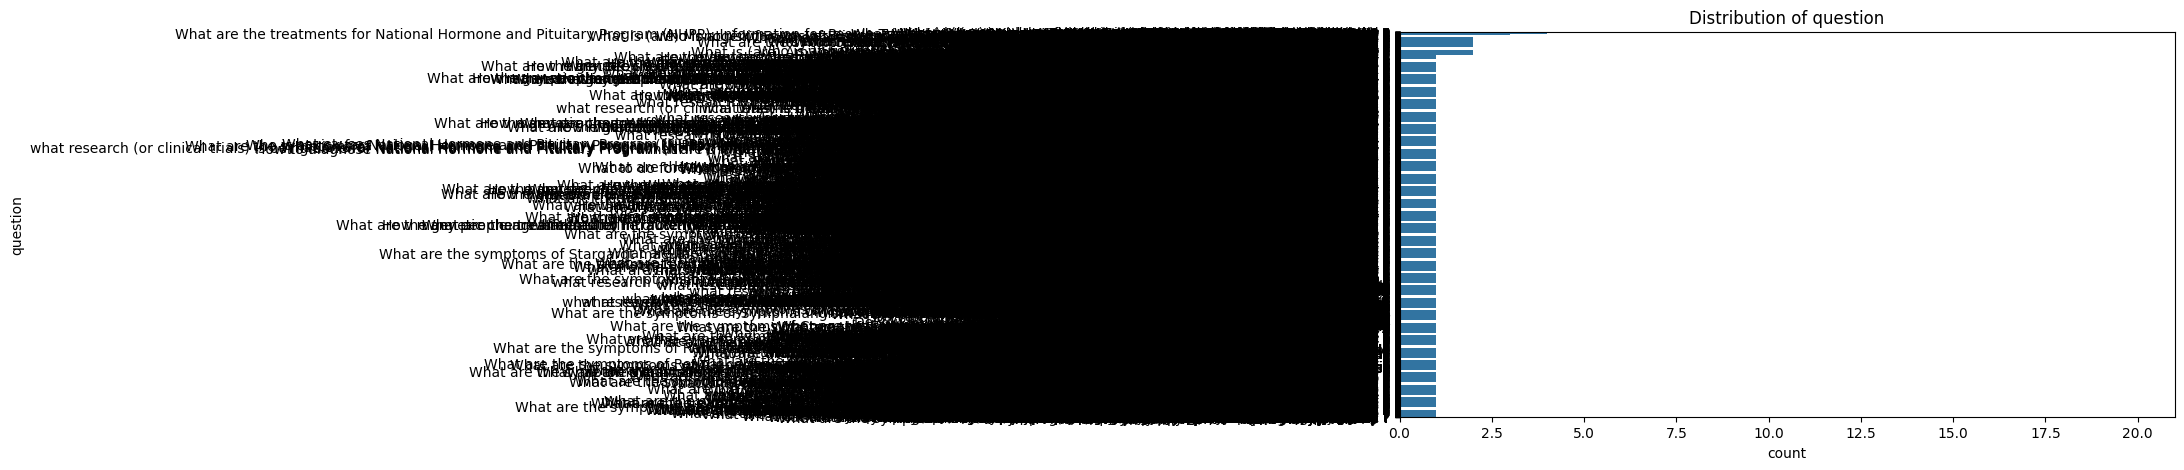

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 97350x5606 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x500 with 1 Axes>

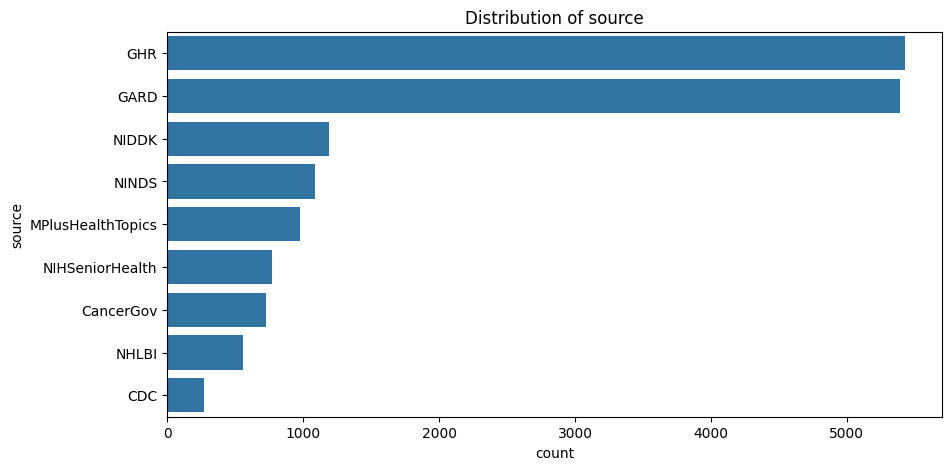

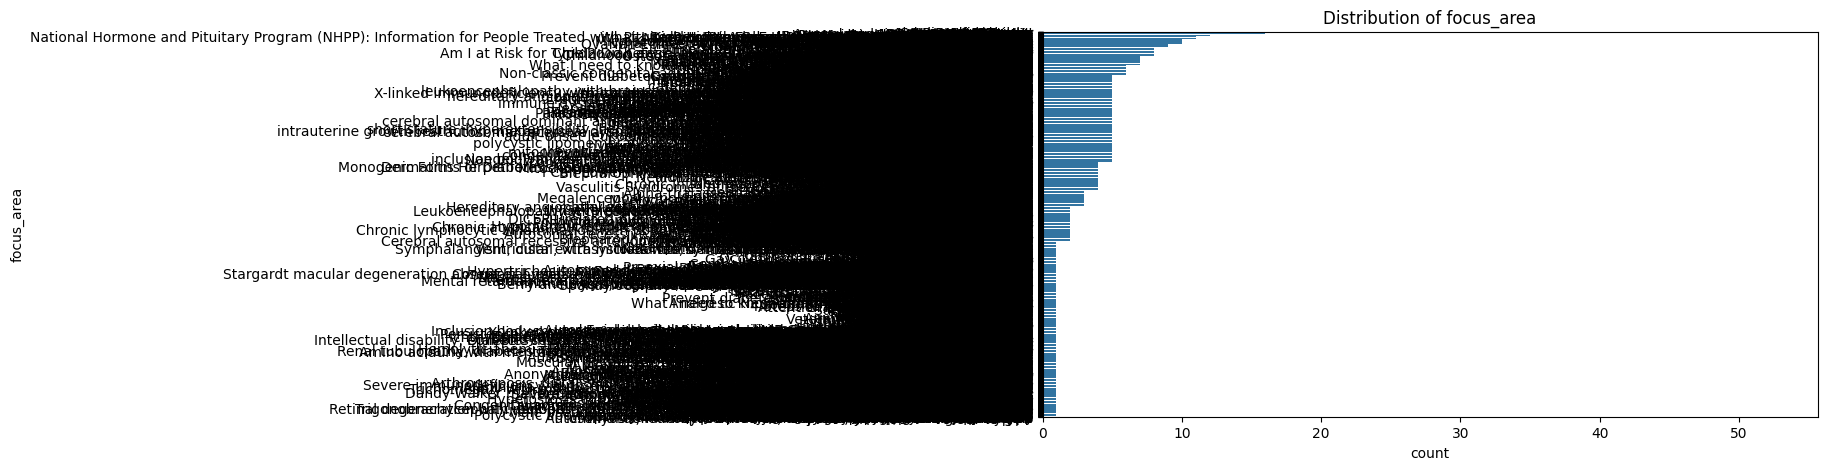

In [6]:
# Generate summary statistics
summary_stats = df.describe(include='all')
print(summary_stats)

# Visualizing data distribution for numerical features (if any)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Visualizing data distribution for categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[column].dropna(), order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()

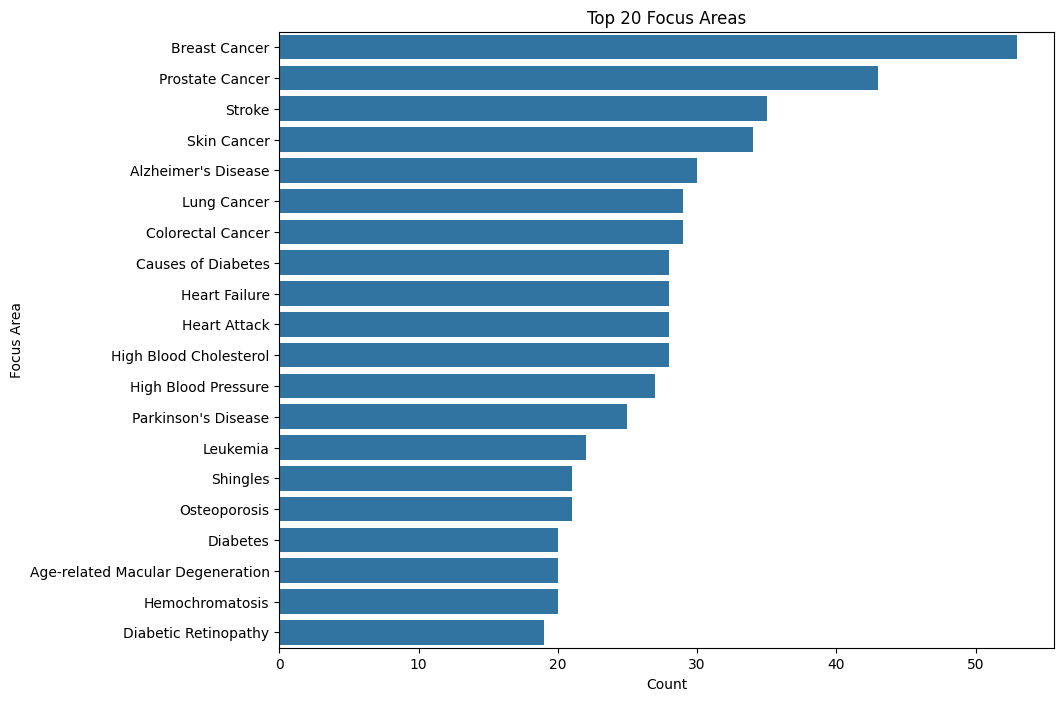

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display only the top N categories
top_n = 20
top_focus_areas = df['focus_area'].value_counts().nlargest(top_n).index

# Filter the dataframe to include only the top N focus areas
filtered_df = df[df['focus_area'].isin(top_focus_areas)]

# Plot the distribution of the top N focus areas
plt.figure(figsize=(10, 8))
sns.countplot(y=filtered_df['focus_area'], order=filtered_df['focus_area'].value_counts().index)
plt.title(f'Top {top_n} Focus Areas')
plt.xlabel('Count')
plt.ylabel('Focus Area')
plt.show()


In [21]:
df.describe()

,question,answer,source,focus_area
count,16412,16412,16412,16398
unique,14984,15818,9,5126
top,What causes Causes of Diabetes ?,This condition is inherited in an autosomal re...,GHR,Breast Cancer
freq,20,348,5430,53
